# Install dependencies

[yamlu](https://github.com/bernhardschaefer/yamlu) stands for "yet another machine learning utility library".
It's a small library that I developed that features a basic COCO parser and functionality to visualize images and their annotations.

In [1]:
%pip install yamlu

Note: you may need to restart the kernel to use updated packages.


# Parse COCO datasets and visualize annotate images

The source code of the [CocoReader](https://github.com/bernhardschaefer/yamlu/blob/main/src/yamlu/coco_read.py) class shows how to parse the COCO json files and load the images.
The COCO json files largely follow the COCO standard.
There are some diagram-specific extensions:
- arrow_prev/arrow_next: Track the id of the source (arrow_prev) and target (arrow_next) shape
- text_belongs_to: Tracks the id of the shape or edge a label annotates

In [1]:
import random
from pathlib import Path

from yamlu import ls
from yamlu.coco_read import CocoReader

datasets_root = Path("./datasets/")
ls(datasets_root)

[PosixPath('datasets/fa'),
 PosixPath('datasets/fca'),
 PosixPath('datasets/fcb'),
 PosixPath('datasets/fcb_scan'),
 PosixPath('datasets/hdBPMN-icdar2021')]

## FC_A

FC_A (aka [OHFCD](http://tc11.cvc.uab.es/datasets/OHFCD_1)) is an online flowchart dataset.

In [6]:
fca_reader = CocoReader(datasets_root / "fca")
ann_imgs = fca_reader.parse_split("train")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 248/248 [00:01<00:00, 175.61it/s]


yamlu visualizes not just bounding boxes, but also the arrow keypoints and the source and target shape that each arrow connects.
The red arrow follows the path `(src shape center, tail arrow keypoint, head arrow keypoint, tgt shape center)`.

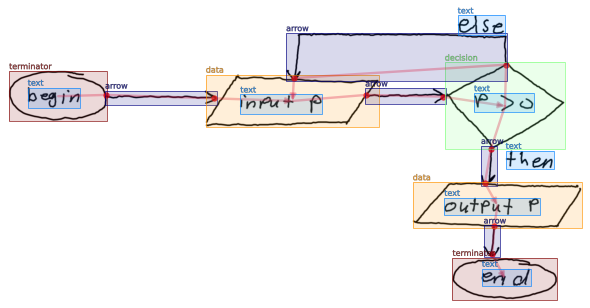

In [10]:
ai = random.choice(ann_imgs)
ai.plot(figsize=(8,8), font_size_scale=1., alpha_kp=0.7)

## FA

The [finite automata dataset](https://cmp.felk.cvut.cz/~breslmar/finite_automata/) by Bresler et al. 

In [12]:
fa_reader = CocoReader(datasets_root / "fa")
ann_imgs = fa_reader.parse_split("train")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 132/132 [00:00<00:00, 173.31it/s]


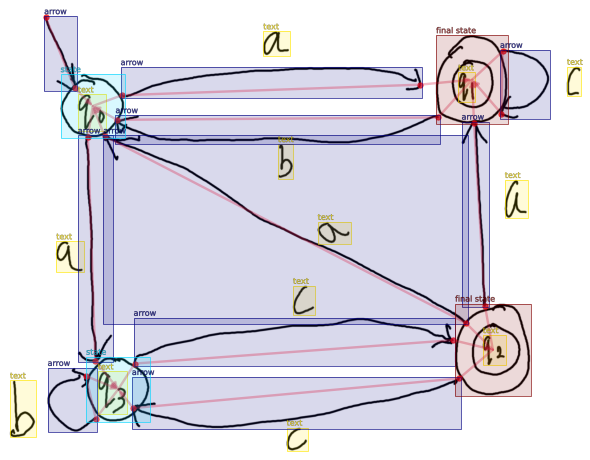

In [13]:
ai = random.choice(ann_imgs)
ai.plot(figsize=(8,8), font_size_scale=1., alpha_kp=0.7)

## FCB_Scan

The [FC Database - Off-line Extension](https://cmp.felk.cvut.cz/~breslmar/flowcharts_offline/index.html) by Bresler et al.

In [14]:
fcb_scan_reader = CocoReader(datasets_root / "fcb_scan")
ann_imgs = fcb_scan_reader.parse_split("train")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:09<00:00, 29.17it/s]


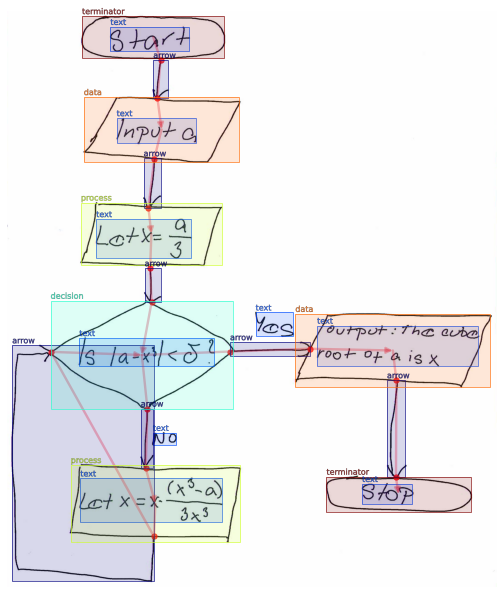

In [15]:
ai = random.choice(ann_imgs)
ai.plot(figsize=(8,8), font_size_scale=1., alpha_kp=0.7)

## hdBPMN (ICDAR 2021)

The [hdBPMN](https://github.com/dwslab/hdBPMN) dataset. The corresponding paper [DiagramNet: Hand-drawn Diagram Recognition using Visual Arrow-relation Detection](https://link.springer.com/chapter/10.1007/978-3-030-86549-8_39) by Bernhard Schäfer and Heiner Stuckenschmidt was presented at ICDAR 2021.

In [2]:
hdbpmn_reader = CocoReader(
    dataset_root=datasets_root / "hdBPMN-icdar2021", 
    arrow_categories={"sequenceFlow", "messageFlow", "dataAssociation"},
)
ann_imgs = hdbpmn_reader.parse_split("val")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 778.30it/s]


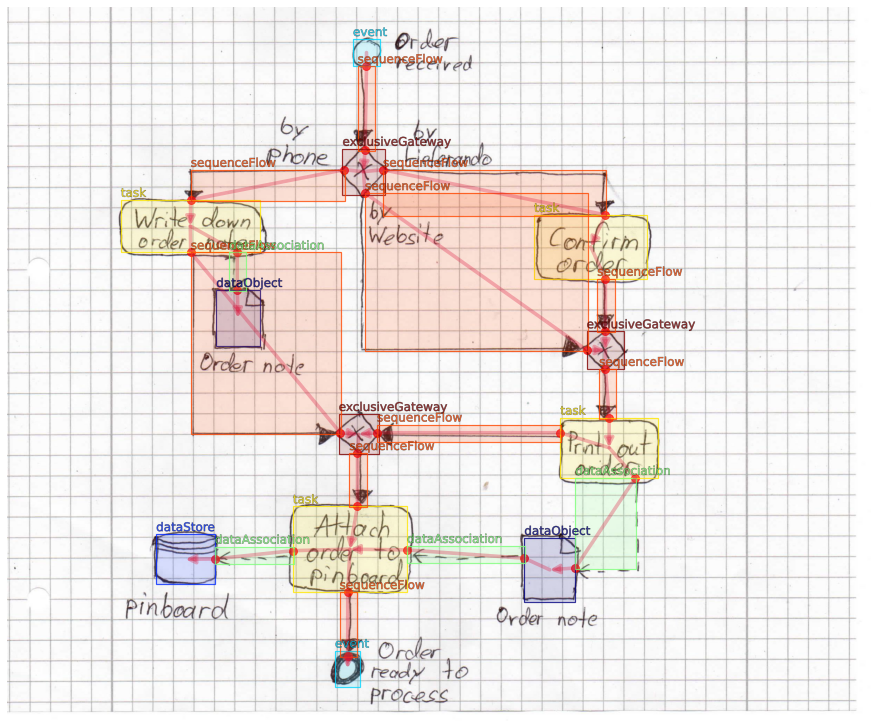

In [3]:
ai = random.choice(ann_imgs)
ai.plot(figsize=(12,12), font_size_scale=1., alpha_kp=0.7)